In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from nbody import Particles, NbodySimulation

# Sun-Earth System

In this notebook, we will test our Solar System (Sun + Earth) simulation.\
For convenice, that's define the `problem_name` here for handling data IO.

In [10]:
problem_name = "test"

Prepare physical constants

In [11]:
msun   = 1.989e33   # gram
mearth = 5.97219e27 # gram
au     = 1.496e13   # cm
day    = 86400      # sec
year   = 365*day    # sec
G      = 6.67e-8   # cgs

Re-implment the particle initialze condition of the Sun+Earth system. 

In [12]:
def initialSolarSystem(particles:Particles):
    
    num_part = 2
    G = 6.67428e-8
    AU = 1.49598e13
    mass_earth = 5.97219e27
    mass_sun = 1.989e33
    d_earth = AU * (mass_sun / (mass_earth + mass_sun))
    d_sun = - AU * (mass_earth / (mass_sun + mass_earth))
    peroid = np.sqrt(4 * np.square(np.pi) * np.power(AU, 3) / (G * (mass_earth + mass_sun)))
    vel_earth = -2 * np.pi * d_earth / peroid
    vel_sun = 2 * np.pi * d_sun / peroid
    acc_earth = -G * mass_earth / np.square(d_earth)
    acc_sun =  G * mass_sun / np.square(d_sun)

    particles = Particles(N = num_part)
    
    masses = particles.get_masses()
    masses[0, 0] = mass_sun
    masses[1, 0] = mass_earth
    
    positions = particles.get_positions()
    positions[0, 0] = d_sun
    positions[1, 0] = d_earth
    
    velocities = particles.get_velocities()
    velocities[0, 1] = vel_sun
    velocities[1, 1] = vel_earth
    print(velocities)
    
    accelerations = particles.get_accelerations()
    accelerations[0, 0] = acc_sun
    accelerations[1, 0] = acc_earth
    
    particles.set_masses(masses)
    particles.set_positions(positions)
    particles.set_velocities(velocities)
    particles.set_accelerations(accelerations)
    
    return particles

Once we initialize the particles, we could run our simulation by

In [13]:
particles = Particles(N=2)
particles = initialSolarSystem(particles)
sim = NbodySimulation(particles)
sim.setup(G=G,method="Euler",io_freq=20,io_title=problem_name,io_screen=False,visualized=False)
sim.evolve(dt=0.1*day,tmax=5*year)

[[ 0.00000000e+00 -8.94447573e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.97890091e+06  0.00000000e+00]]
pos:  [-4.49183005e+07  1.49597551e+13] [0. 0.] [0. 0.]
phi, theta:  3.141592653589793 1.5707963267948966
Fy : -433564295036.5258
acc:  [[ 1.77995030e-06 -2.17981043e-22  0.00000000e+00]
 [-5.92801156e-01  7.25972039e-17  0.00000000e+00]]
check:  [[-4.49183005e+07 -7.72802703e+04  0.00000000e+00]
 [ 1.49597551e+13 -2.57377039e+10  0.00000000e+00]]
data_test/data_test_00000.txt
pos:  [-4.49183005e+07  1.49597551e+13] [-7.72802703e+04 -2.57377039e+10] [0. 0.]
phi, theta:  3.1398722027027146 1.5707963267948966
Fy : -6.090927609780323e+24
acc:  [[ 1.77994239e-06 -3.06230649e-09  0.00000000e+00]
 [-5.92798524e-01  1.01988175e-03  0.00000000e+00]]
check:  [[-4.49181676e+07 -1.54560541e+05  0.00000000e+00]
 [ 1.49597108e+13 -5.14754077e+10  0.00000000e+00]]
pos:  [-4.49181676e+07  1.49597108e+13] [-1.54560541e+05 -5.14754077e+10] [0. 0.]
phi, theta:  3.138151751822045 1.5707963267948966
Fy :

# Load data and Visualization

note: `conda install -c conda-forge ffmpeg` might be necessary

In [14]:
import glob

In [15]:
fns = "data_"+problem_name+"/"+"data_"+problem_name+"_[0-9][0-9][0-9][0-9][0-9].txt"
fns = glob.glob(fns)
fns.sort()
# print(fns)

loadtxt done data_test/data_test_00000.txt
loadtxt done data_test/data_test_00002.txt
loadtxt done data_test/data_test_00004.txt
loadtxt done data_test/data_test_00006.txt
loadtxt done data_test/data_test_00008.txt
loadtxt done data_test/data_test_00020.txt
loadtxt done data_test/data_test_00040.txt
loadtxt done data_test/data_test_00060.txt
loadtxt done data_test/data_test_00080.txt
loadtxt done data_test/data_test_00100.txt
loadtxt done data_test/data_test_00120.txt
loadtxt done data_test/data_test_00140.txt
loadtxt done data_test/data_test_00160.txt
loadtxt done data_test/data_test_00180.txt
loadtxt done data_test/data_test_00200.txt
loadtxt done data_test/data_test_00220.txt
loadtxt done data_test/data_test_00240.txt
loadtxt done data_test/data_test_00260.txt
loadtxt done data_test/data_test_00280.txt
loadtxt done data_test/data_test_00300.txt
loadtxt done data_test/data_test_00320.txt
loadtxt done data_test/data_test_00340.txt
loadtxt done data_test/data_test_00360.txt
loadtxt don

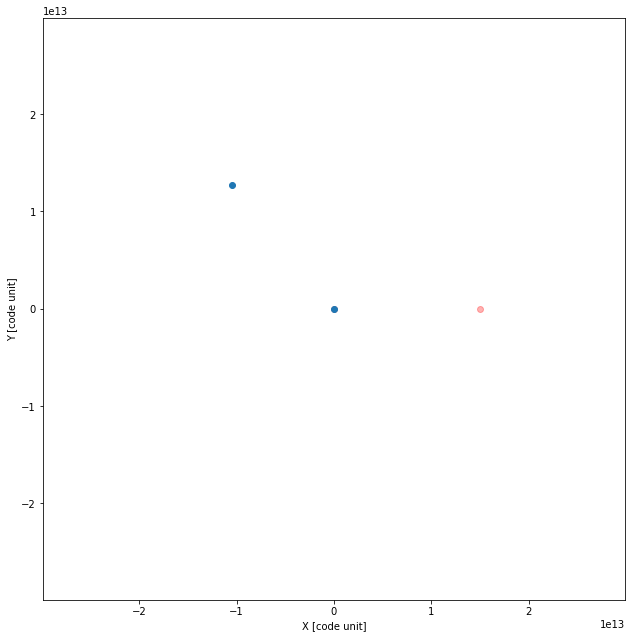

In [16]:
scale = 2 * au

fig, ax =plt.subplots()
fig.set_size_inches(10.5, 10.5, forward=True)
fig.set_dpi(72)
ol,   = ax.plot([0,au],[0,0],'ro',alpha=0.3) # the initial conditions
line, = ax.plot([],[],'o')                   # plots of particles

def init():
    ax.set_xlim(-scale,scale)
    ax.set_ylim(-scale,scale)
    ax.set_aspect('equal')
    ax.set_xlabel('X [code unit]')
    ax.set_ylabel('Y [code unit]')
    return line,

def updateParticles(frame):
    fn = fns[frame]
    m,t,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt(fn)
    print("loadtxt done",fn)
    line.set_data(x,y)
    return line,

ani = animation.FuncAnimation(fig, updateParticles, frames=len(fns),init_func=init, blit=True)
ani.save('movie_'+problem_name+'.mp4',fps=10)